In [ ]:
!pip install wordcloud
!pip install Sastrawi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 812.6 kB/s eta 0:00:00


In [ ]:
# Mount Google Drive (untuk mengkoneksikan dengan google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/UasNLP/tiktokseller_data.csv')


In [ ]:
data.head(10)

,userName,score,tanggal,review
0,Ayu Gia,4,12/28/2023 23:33,Aplikasinya bagus dan sangat membantu
1,Hasan Craft,1,12/28/2023 21:11,cukup baik
2,shusie lie (Shusie),1,12/28/2023 21:01,Ngeselin banget HP lama saya yg waktu mendafta...
3,Syailendra Pratama,1,12/28/2023 19:28,Aplikasi koplak .login gak bisa.selalu verifik...
4,Baron Garut,2,12/28/2023 17:31,Kenapa sih padahal udah di donload persi baru ...
5,Nia Karolina,5,12/28/2023 16:21,Admin kenapa toko seler sekarang menunya GK ad...
6,snf 2012,5,12/28/2023 15:44,Ok
7,Munira,1,12/28/2023 15:08,"Mohon bantuan nya,saya baru pemula,semoga saya..."
8,Bila Safitri,3,12/28/2023 14:29,Tolonggggggg dongg syaa mau daftar gk bsa² knd...
9,Ruhiyat Thesadar,5,12/28/2023 14:08,Ok


In [ ]:
#simpan ke variable data

my_df = data[['userName', 'score', 'tanggal', 'review']]

In [ ]:
#membutuhkan kolom score dan review
my_df = data[['score', 'review']]

In [ ]:
my_df.head()

,score,review
0,4,Aplikasinya bagus dan sangat membantu
1,1,cukup baik
2,1,Ngeselin banget HP lama saya yg waktu mendafta...
3,1,Aplikasi koplak .login gak bisa.selalu verifik...
4,2,Kenapa sih padahal udah di donload persi baru ...


**PELABELAN**




In [ ]:
def pelabelan(score):
    if score < 3:
        return 'Negatif'
    elif score == 4 or score == 5:
        return 'Positif'

my_df['label'] = my_df['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-8-475a3a7d8d05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['label'] = my_df['score'].apply(pelabelan)


,score,review,label
0,4,Aplikasinya bagus dan sangat membantu,Positif
1,1,cukup baik,Negatif
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif
6,5,Ok,Positif
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif
8,3,Tolonggggggg dongg syaa mau daftar gk bsa² knd...,None
9,5,Ok,Positif


In [ ]:
#save menjadi  file csv
my_df.to_csv("label_tiktokseller.csv, index = false")


In [ ]:
from google.colab import files

my_df.to_csv("label_tiktokseller.csv", index=False)
files.download("label_tiktokseller.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Pembersihan data (Data cleaning)**

In [ ]:
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/label_tiktokseller.csv')
my_df.head(50)

,score,review,label
0,4,Aplikasinya bagus dan sangat membantu,Positif
1,1,cukup baik,Negatif
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif
6,5,Ok,Positif
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif
8,3,Tolonggggggg dongg syaa mau daftar gk bsa² knd...,NaN
9,5,Ok,Positif


In [ ]:
#menampilkan informasi tentang data
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   17000 non-null  int64 
 1   review  17000 non-null  object
 2   label   16206 non-null  object
dtypes: int64(1), object(2)
memory usage: 398.6+ KB


In [ ]:
#menampilkan baris yang memiliki nilai null (NaN) pada kolom appaun
my_df.isna()

,score,review,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
16995,False,False,False
16996,False,False,False
16997,False,False,False
16998,False,False,False


In [ ]:
#kita lihat
my_df.isna().any()

score     False
review    False
label      True
dtype: bool

In [ ]:
my_df.describe()

,score
count,17000.000000
mean,3.616765
std,1.766375
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
#mencari jumlah baris data yang bernilai null
my_df.isnull().sum()

score       0
review      0
label     794
dtype: int64

In [ ]:
my_df.dropna(subset=['label'],inplace = True)

In [ ]:
my_df.isnull().sum()

score     0
review    0
label     0
dtype: int64

In [ ]:
my_df.head(50)

,score,review,label
0,4,Aplikasinya bagus dan sangat membantu,Positif
1,1,cukup baik,Negatif
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif
6,5,Ok,Positif
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif
9,5,Ok,Positif
11,1,Kode verifikasi ny kok gk bisa di masuk in.gmn...,Negatif


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16206 entries, 0 to 16999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   16206 non-null  int64 
 1   review  16206 non-null  object
 2   label   16206 non-null  object
dtypes: int64(1), object(2)
memory usage: 506.4+ KB


In [ ]:
#simpan hasil file data cleaning
my_df.to_csv("tiktokseller_clean1.csv", index = False)

**PREPROCESSING**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/tiktokseller_clean1.csv')
df.head(50)

,score,review,label
0,4,Aplikasinya bagus dan sangat membantu,Positif
1,1,cukup baik,Negatif
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif
6,5,Ok,Positif
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif
8,5,Ok,Positif
9,1,Kode verifikasi ny kok gk bisa di masuk in.gmn...,Negatif


**CASE FOLDING**

In [ ]:
#Mengubah seluruh hurup menjadi hurup kecil
import re

def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9 \t])|(\w+:\/\/\S+)/^rt|http.+?", "", elem))
    #remove number
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df



In [ ]:
my_df['text_clean'] = my_df['review'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'review', 'text_clean')
data_clean.head(10)

,score,review,label,text_clean
0,4,Aplikasinya bagus dan sangat membantu,Positif,aplikasinya bagus dan sangat membantu
1,1,cukup baik,Negatif,cukup baik
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif,ngeselin banget hp lama saya yg waktu mendafta...
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif,aplikasi koplak .login gak bisa.selalu verifik...
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif,kenapa sih padahal udah di donload persi baru ...
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif,admin kenapa toko seler sekarang menunya gk ad...
6,5,Ok,Positif,ok
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif,"mohon bantuan nya,saya baru pemula,semoga saya..."
9,5,Ok,Positif,ok
11,1,Kode verifikasi ny kok gk bisa di masuk in.gmn...,Negatif,kode verifikasi ny kok gk bisa di masuk in.gmn...


**Stopword removal**

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,score,review,label,text_clean,text_StopWord
0,4,Aplikasinya bagus dan sangat membantu,Positif,aplikasinya bagus dan sangat membantu,aplikasinya bagus membantu
1,1,cukup baik,Negatif,cukup baik,
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif,ngeselin banget hp lama saya yg waktu mendafta...,ngeselin banget hp yg mendaftar sbg penjual ru...
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif,aplikasi koplak .login gak bisa.selalu verifik...,aplikasi koplak .login gak bisa.selalu verifik...
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif,kenapa sih padahal udah di donload persi baru ...,sih udah donload persi ga ya
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif,admin kenapa toko seler sekarang menunya gk ad...,admin toko seler menunya gk gambar nya ya
6,5,Ok,Positif,ok,ok
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif,"mohon bantuan nya,saya baru pemula,semoga saya...","mohon bantuan nya,saya pemula,semoga kendala a..."
9,5,Ok,Positif,ok,ok
11,1,Kode verifikasi ny kok gk bisa di masuk in.gmn...,Negatif,kode verifikasi ny kok gk bisa di masuk in.gmn...,kode verifikasi ny gk masuk in.gmna cra ny


**TOKENIZING**


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,score,review,label,text_clean,text_StopWord,text_tokens
0,4,Aplikasinya bagus dan sangat membantu,Positif,aplikasinya bagus dan sangat membantu,aplikasinya bagus membantu,"[aplikasinya, bagus, membantu]"
1,1,cukup baik,Negatif,cukup baik,,[]
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif,ngeselin banget hp lama saya yg waktu mendafta...,ngeselin banget hp yg mendaftar sbg penjual ru...,"[ngeselin, banget, hp, yg, mendaftar, sbg, pen..."
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif,aplikasi koplak .login gak bisa.selalu verifik...,aplikasi koplak .login gak bisa.selalu verifik...,"[aplikasi, koplak, .login, gak, bisa.selalu, v..."
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif,kenapa sih padahal udah di donload persi baru ...,sih udah donload persi ga ya,"[sih, udah, donload, persi, ga, ya]"


STEMMING

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#------------STEMMING-------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

#apply stemmed term to dataFrame
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_stemindo'] = data_clean['text_tokens'].apply(lambda x: ' '.join(get_stemmed_term(x)))
data_clean.head(20)

Streaming output truncated to the last 5000 lines.
7422 : dya : dya
7423 : peroduock : peroduock
7424 : bodo² : bodo
7425 : bella : bella
7426 : senam : senam
7427 : wujudkan : wujud
7428 : mimpi : mimpi
7429 : ☺✨ : 
7430 : progam : progam
7431 : minyak : minyak
7432 : bulus : bulus
7433 : najisss : najisss
7434 : kecewakan : kecewa
7435 : cuih : cuih
7436 : durasi : durasi
7437 : rekaman : rekam
7438 : ngalahin : ngalahin
7439 : mandi : mandi
7440 : lumpur : lumpur
7441 : pertahanin : pertahanin
7442 : baguuuuuuus : baguuuuuuus
7443 : muntap : muntap
7444 : disediakan : sedia
7445 : pokeh : pokeh
7446 : logis : logis
7447 : hedehh : hedehh
7448 : tarikk : tarikk
7449 : noreknya : noreknya
7450 : dkirm : dkirm
7451 : obral : obral
7452 : bicaranya : bicara
7453 : kru : kru
7454 : jajaran : jajar
7455 : staf : staf
7456 : robotik : robotik
7457 : meresahkan : resah
7458 : kamii : kami
7459 : dihapusin : dihapusin
7460 : aeperti : aeperti
7461 : merosot : merosot
7462 : membebankan : beb

,score,review,label,text_clean,text_StopWord,text_tokens,text_stemindo
0,4,Aplikasinya bagus dan sangat membantu,Positif,aplikasinya bagus dan sangat membantu,aplikasinya bagus membantu,"[aplikasinya, bagus, membantu]",aplikasi bagus bantu
1,1,cukup baik,Negatif,cukup baik,,[],
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif,ngeselin banget hp lama saya yg waktu mendafta...,ngeselin banget hp yg mendaftar sbg penjual ru...,"[ngeselin, banget, hp, yg, mendaftar, sbg, pen...",ngeselin banget hp yg daftar sbg jual rusak ga...
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif,aplikasi koplak .login gak bisa.selalu verifik...,aplikasi koplak .login gak bisa.selalu verifik...,"[aplikasi, koplak, .login, gak, bisa.selalu, v...",aplikasi koplak login gak bisa selalu verifika...
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif,kenapa sih padahal udah di donload persi baru ...,sih udah donload persi ga ya,"[sih, udah, donload, persi, ga, ya]",sih udah donload pers ga ya
5,5,Admin kenapa toko seler sekarang menunya GK ad...,Positif,admin kenapa toko seler sekarang menunya gk ad...,admin toko seler menunya gk gambar nya ya,"[admin, toko, seler, menunya, gk, gambar, nya,...",admin toko seler menu gk gambar nya ya
6,5,Ok,Positif,ok,ok,[ok],ok
7,1,"Mohon bantuan nya,saya baru pemula,semoga saya...",Negatif,"mohon bantuan nya,saya baru pemula,semoga saya...","mohon bantuan nya,saya pemula,semoga kendala a...","[mohon, bantuan, nya, ,, saya, pemula, ,, semo...",mohon bantu nya saya mula moga kendala apa s...
9,5,Ok,Positif,ok,ok,[ok],ok
11,1,Kode verifikasi ny kok gk bisa di masuk in.gmn...,Negatif,kode verifikasi ny kok gk bisa di masuk in.gmn...,kode verifikasi ny gk masuk in.gmna cra ny,"[kode, verifikasi, ny, gk, masuk, in.gmna, cra...",kode verifikasi ny gk masuk in gmna cra ny


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16206 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   score          16206 non-null  int64 
 1   review         16206 non-null  object
 2   label          16206 non-null  object
 3   text_clean     16206 non-null  object
 4   text_StopWord  16206 non-null  object
 5   text_tokens    16206 non-null  object
 6   text_stemindo  16206 non-null  object
dtypes: int64(1), object(6)
memory usage: 1012.9+ KB


In [ ]:
#simpan ke file csv
data_clean.to_csv('hasil_PreProcessing_tiktokseller.csv', index= False)

**VISUALISASI KATA**

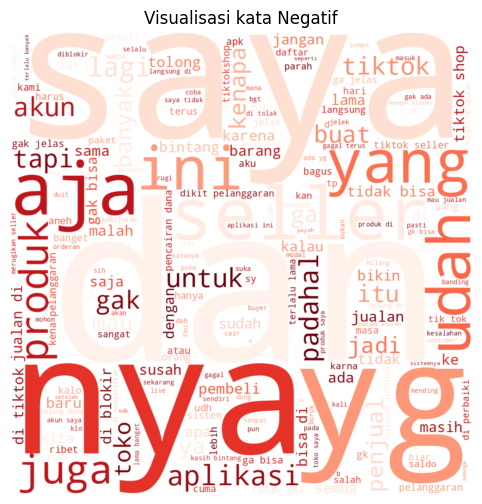

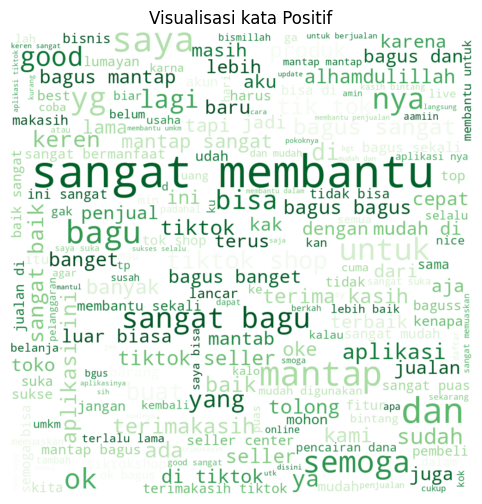

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menginisialisasi DataFrame negatif
negatif = pd.DataFrame()

# Mengisi negatif dengan data dari sumber yang sesuai
# Misalnya, jika negatif berasal dari file CSV:
negatif = pd.read_csv('hasil_PreProcessing_tiktokseller.csv')

# Memisahkan data menjadi data positif dan negatif
data_positif = negatif[negatif['label'] == 'Positif']
data_negatif = negatif[negatif['label'] == 'Negatif']

# Melakukan visualisasi kata-kata negatif menggunakan WordCloud
all_text_negatif = ' '.join(word for word in data_negatif["text_clean"])
wordcloud_negatif = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negatif)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi kata Negatif")
plt.margins(x=0, y=0)
plt.show()

# Melakukan visualisasi kata-kata positif menggunakan WordCloud
all_text_positif = ' '.join(word for word in data_positif["text_clean"])
wordcloud_positif = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positif)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data_clean['label'].value_counts()

Positif    10843
Negatif     5363
Name: label, dtype: int64

In [ ]:
data_clean.head()

,score,review,label,text_clean,text_StopWord,text_tokens,text_stemindo
0,4,Aplikasinya bagus dan sangat membantu,Positif,aplikasinya bagus dan sangat membantu,aplikasinya bagus membantu,"[aplikasinya, bagus, membantu]",aplikasi bagus bantu
1,1,cukup baik,Negatif,cukup baik,,[],
2,1,Ngeselin banget HP lama saya yg waktu mendafta...,Negatif,ngeselin banget hp lama saya yg waktu mendafta...,ngeselin banget hp yg mendaftar sbg penjual ru...,"[ngeselin, banget, hp, yg, mendaftar, sbg, pen...",ngeselin banget hp yg daftar sbg jual rusak ga...
3,1,Aplikasi koplak .login gak bisa.selalu verifik...,Negatif,aplikasi koplak .login gak bisa.selalu verifik...,aplikasi koplak .login gak bisa.selalu verifik...,"[aplikasi, koplak, .login, gak, bisa.selalu, v...",aplikasi koplak login gak bisa selalu verifika...
4,2,Kenapa sih padahal udah di donload persi baru ...,Negatif,kenapa sih padahal udah di donload persi baru ...,sih udah donload persi ga ya,"[sih, udah, donload, persi, ga, ya]",sih udah donload pers ga ya


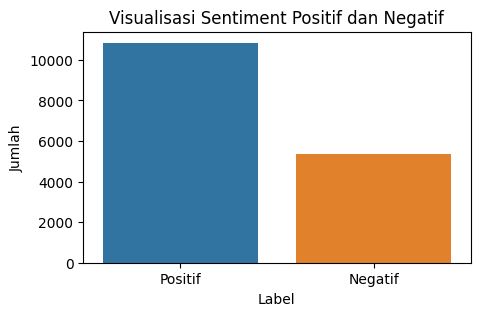

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menginisialisasi dan mengisi variabel data_clean dengan data yang sesuai
data_clean = pd.read_csv('hasil_PreProcessing_tiktokseller.csv')

# Visualisasi sentiment positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='label')
plt.title('Visualisasi Sentiment Positif dan Negatif')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16206 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   score          16206 non-null  int64 
 1   review         16206 non-null  object
 2   label          16206 non-null  object
 3   text_clean     16206 non-null  object
 4   text_StopWord  16206 non-null  object
 5   text_tokens    16206 non-null  object
 6   text_stemindo  16206 non-null  object
dtypes: int64(1), object(6)
memory usage: 1012.9+ KB


**Data Preparation**

In [ ]:
# Kolom teks yang ingin diolah
X = my_df['review']

In [ ]:
#memisahkan data latih dan data uji
X = data_clean['text_clean']
y = data_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#menggunakan CounVectorizer untuk mengubah teks menjadi numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.fit_transform(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE

# Menggunakan oversampling menggunakan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

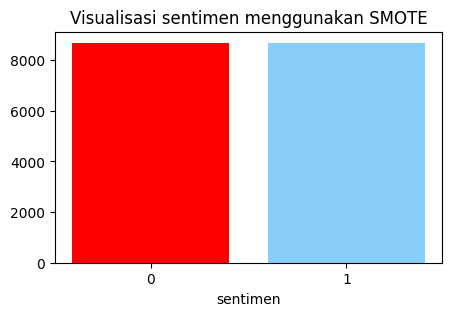

In [ ]:
sentiment_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'lightskyblue'])
plt.xlabel('sentimen')
plt.title('Visualisasi sentimen menggunakan SMOTE')
plt.xticks(sentiment_counts.index, ['0', '1'])
plt.show()

**MODELLING**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Vektorisasi data latihan
vectorizer = TfidfVectorizer(max_features=9682)
X_train_vec = vectorizer.fit_transform(X_train)

In [ ]:
# Inisialisasi dan latih model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Vektorisasi data uji dengan parameter yang sama
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Lakukan prediksi
y_pred = naive_bayes.predict(X_test_vec)

In [ ]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9012954966070327
Confusion Matrix:
[[ 945  144]
 [ 176 1977]]
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.84      0.87      0.86      1089
     Positif       0.93      0.92      0.93      2153

    accuracy                           0.90      3242
   macro avg       0.89      0.89      0.89      3242
weighted avg       0.90      0.90      0.90      3242



In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16206 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   score          16206 non-null  int64 
 1   review         16206 non-null  object
 2   label          16206 non-null  object
 3   text_clean     16206 non-null  object
 4   text_StopWord  16206 non-null  object
 5   text_tokens    16206 non-null  object
 6   text_stemindo  16206 non-null  object
dtypes: int64(1), object(6)
memory usage: 1012.9+ KB
